<a href="https://colab.research.google.com/github/Harishankarvel/LAUN_ML_project/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.

--- Processed Data for Modeling (Last 5 Years) ---
      Year  Matches_Played  Matches_Won  Win_Percentage_Current_Year  \
44  2019.0              27           19                    70.370370   
45  2020.0               9            3                    33.333333   
46  2021.0               6            4                    66.666667   
47  2022.0              24           14                    58.333333   
48  2023.0               9            7                    77.777778   

    Win_Percentage_Previous_Year  
44                     70.000000  
45                     70.370370  
46                     33.333333  
47                     66.666667  
48                     58.333333  


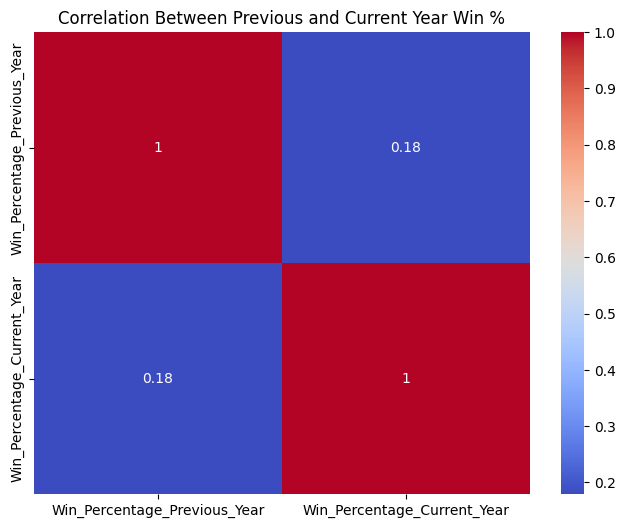

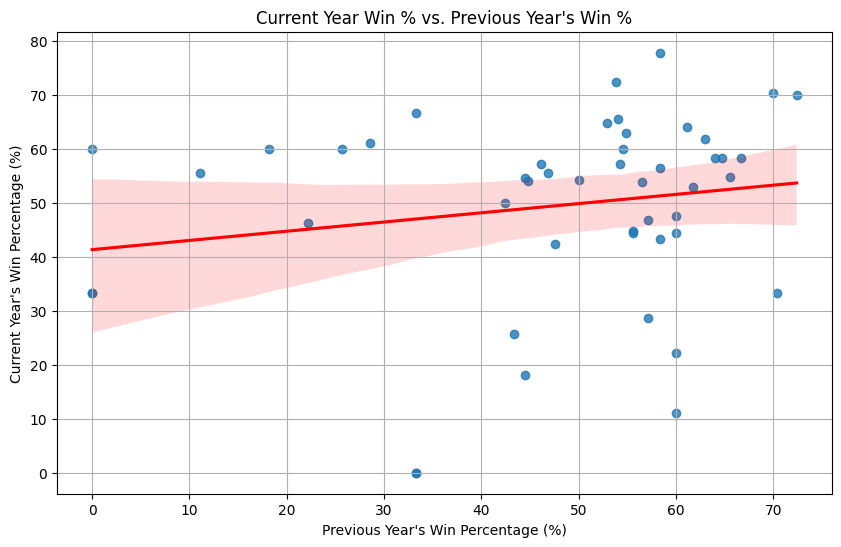


--- Model Evaluation ---
Mean Absolute Error (MAE): 10.34%
R-squared (R²): -1.66

--- Final Prediction ---
Based on India's win percentage of 77.78% in 2023,
the model predicts a win percentage of 53.05% for 2024.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df_raw = pd.read_csv('odi_matches.csv', index_col=0)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'odi_matches.csv' not found. Please ensure the file is uploaded to the Colab session.")
    exit()

df_raw.rename(columns={'Team_1': 'Team 1', 'Team_2': 'Team 2', 'Match Date': 'Date'}, inplace=True)
# Use errors='coerce' to handle inconsistent date formats
df_raw['Date'] = pd.to_datetime(df_raw['Date'], errors='coerce')
df_raw['Year'] = df_raw['Date'].dt.year

df_india = df_raw[(df_raw['Team 1'] == 'India') | (df_raw['Team 2'] == 'India')].copy()
df_india['India_Won'] = (df_india['Winner'] == 'India').astype(int)

annual_stats = df_india.groupby('Year').agg(
    Matches_Played=('Date', 'count'),
    Matches_Won=('India_Won', 'sum')
).reset_index()

annual_stats['Win_Percentage'] = (annual_stats['Matches_Won'] / annual_stats['Matches_Played']) * 100
annual_stats['Win_Percentage_Previous_Year'] = annual_stats['Win_Percentage'].shift(1)

df_model = annual_stats.dropna().copy()
df_model.rename(columns={'Win_Percentage': 'Win_Percentage_Current_Year'}, inplace=True)

print("\n--- Processed Data for Modeling (Last 5 Years) ---")
print(df_model.tail())

plt.figure(figsize=(8, 6))
correlation_matrix = df_model[['Win_Percentage_Previous_Year', 'Win_Percentage_Current_Year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Previous and Current Year Win %')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x='Win_Percentage_Previous_Year', y='Win_Percentage_Current_Year', data=df_model, line_kws={"color": "red"})
plt.title("Current Year Win % vs. Previous Year's Win %")
plt.xlabel("Previous Year's Win Percentage (%)")
plt.ylabel("Current Year's Win Percentage (%)")
plt.grid(True)
plt.show()

X = df_model[['Win_Percentage_Previous_Year']]
y = df_model['Win_Percentage_Current_Year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n--- Model Evaluation ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}%")
print(f"R-squared (R²): {r2:.2f}")

last_known_year = int(df_model['Year'].iloc[-1])
last_known_win_percentage = df_model['Win_Percentage_Current_Year'].iloc[-1]

prediction_data = pd.DataFrame({'Win_Percentage_Previous_Year': [last_known_win_percentage]})
next_year_prediction = model.predict(prediction_data)

print("\n--- Final Prediction ---")
print(f"Based on India's win percentage of {last_known_win_percentage:.2f}% in {last_known_year},")
print(f"the model predicts a win percentage of {next_year_prediction[0]:.2f}% for {last_known_year + 1}.")